In [7]:
import numpy as np
import matplotlib.pyplot as plt
from gate_estimation.resource_analysis import *
from gate_estimation.optimization_utils import *
from benchmark_utils import *
from qsharp.estimator import EstimatorParams
from qsharp.interop.qiskit import ResourceEstimatorBackend
from qiskit_addon_cutting.automated_cut_finding import (
    find_cuts,
    OptimizationParameters,
    DeviceConstraints,
)
from qiskit_addon_cutting import cut_wires,partition_problem

for i in [3,4,5,6,7,8,9]:
    print('lattice:',i)
    for j in [1,2,3,4,5]:
        circuit =build_lattice_hamiltonian(num_spins=i**2, Dimension=(i,i), model='Ising')
        # Specify settings for the cut-finding optimizer
        optimization_settings = OptimizationParameters(seed=111)

        # Specify the size of the QPUs available
        device_constraints = DeviceConstraints(qubits_per_subcircuit=circuit.num_qubits//2)

        cut_circuits, metadata = find_cuts(circuit, optimization_settings, device_constraints)
        
        qc_w_ancilla = cut_wires(cut_circuits)
        partitioned_problem = partition_problem(circuit=qc_w_ancilla)
        subcircuit= partitioned_problem.subcircuits
        subcircuits = [cuts_filter(s) for s in subcircuit.values()]

        params = EstimatorParams()
        params.error_budget = 0.001
        params.constraints.max_t_factories = 1
        backend = ResourceEstimatorBackend()
        job = backend.run(circuit, params)
        r = job.result()
        Q = r['physicalCounts']['physicalQubits']
        T = r['physicalCounts']['runtime']*1e-9
        
        total_partition = [c.num_qubits for c in subcircuits]
        error_buget = [0.001*p/sum(total_partition) for p in total_partition]
        r = []
        t = 0
        for idx, s in enumerate(subcircuits):
            # params = estimator.make_params(num_items=1)
            # params.constraints.max_t_factories = 1
            # params.error_budget = error_buget[idx]
            # job = estimator.submit(s, input_params=params)

            params = EstimatorParams()
            params.error_budget = error_buget[idx]
            params.constraints.max_t_factories = j
            backend = ResourceEstimatorBackend()
            job = backend.run(s, params)    
            r.append(job.result()['physicalCounts']['physicalQubits'])
            t += job.result()['physicalCounts']['runtime']*1e-9
        print(max(r)/Q, t/T)

lattice: 3
0.7760336906584993 0.6969696969696969
1.7598774885145483 0.33233877233877235
2.6653139356814703 0.22920327535712154
2.2645482388973965 0.17454545454545453
2.7821592649310873 0.1393939393939394
lattice: 4
0.8147229951935239 0.6875207302119654
0.9686314191753099 0.4062717053264655
1.3106501391348344 0.2711251694532309
1.6526688590943588 0.20313585266323275
1.9946875790538832 0.16250174798302983
lattice: 5
0.6808791052219135 0.8387455196913799
1.3026287668305194 0.4016981674614362
1.7712117973926051 0.2571793301713491
1.562833938875828 0.20968851667367724
1.9623138847332051 0.1663735248024879
lattice: 6
0.5582308990118101 0.8597271959615634
0.7751506387081224 0.4298666798158296
0.9920703784044348 0.286579841100585
1.2089901181007472 0.2149333399079148
1.4259098577970595 0.17194790466035098
lattice: 7
0.6109239977674705 0.8852678156817505
0.6968378914143845 0.4426314328022293
0.8700513866702593 0.2951589658392809
1.043264881926134 0.22131418423433383
1.216478377182009 0.17704375

In [9]:
for i in [5,10,20,30,40,50,60]:
    circuit =generate_circ(num_qubits=i, circuit_type='qft', seed=42)
    # Specify settings for the cut-finding optimizer
    optimization_settings = OptimizationParameters(seed=111)

    # Specify the size of the QPUs available
    device_constraints = DeviceConstraints(qubits_per_subcircuit=circuit.num_qubits//2)

    cut_circuits, metadata = find_cuts(circuit, optimization_settings, device_constraints)
    
    qc_w_ancilla = cut_wires(cut_circuits)
    partitioned_problem = partition_problem(circuit=qc_w_ancilla)
    subcircuit= partitioned_problem.subcircuits
    subcircuits = [cuts_filter(s) for s in subcircuit.values()]

    params = EstimatorParams()
    params.error_budget = 0.001
    params.constraints.max_t_factories = 1
    backend = ResourceEstimatorBackend()
    job = backend.run(circuit, params)
    r = job.result()
    Q = r['physicalCounts']['physicalQubits']
    T = r['physicalCounts']['runtime']*1e-9
    
    total_partition = [c.num_qubits for c in subcircuits]
    error_buget = [0.001*p/sum(total_partition) for p in total_partition]
    r = []
    r_even = []
    for idx, s in enumerate(subcircuits):
        # params = estimator.make_params(num_items=1)
        # params.constraints.max_t_factories = 1
        # params.error_budget = error_buget[idx]
        # job = estimator.submit(s, input_params=params)

        params = EstimatorParams()
        params.error_budget = error_buget[idx]
        params.constraints.max_t_factories = 1
        backend = ResourceEstimatorBackend()
        job = backend.run(s, params)    
        r.append(job.result()['physicalCounts']['physicalQubits'])
    for idx, s in enumerate(subcircuits):
        params = EstimatorParams()
        params.error_budget = 0.0005
        params.constraints.max_t_factories = 1
        backend = ResourceEstimatorBackend()
        job = backend.run(s, params)    
        r_even.append(job.result()['physicalCounts']['physicalQubits'])
    print(max(r_even)/Q-max(r)/Q)

EstimatorError: Error estimating resources (Qsc.Estimates.AlgorithmHasNoResources):
Algorithm requires at least one magic state or measurement to estimate resources

In [2]:
from qiskit_addon_cutting.automated_cut_finding import (
    find_cuts,
    OptimizationParameters,
    DeviceConstraints,
)
circuit6 = generate_circ(num_qubits=6, circuit_type='qft', seed=42)
# Specify settings for the cut-finding optimizer
optimization_settings = OptimizationParameters(seed=111)

# Specify the size of the QPUs available
device_constraints = DeviceConstraints(qubits_per_subcircuit=4)

cut_circuits, metadata = find_cuts(circuit6, optimization_settings, device_constraints)
print(
    f'Found solution using {len(metadata["cuts"])} cuts with a sampling '
    f'overhead of {metadata["sampling_overhead"]} and classical runtime {metadata["sampling_overhead"]}.\n'
    f'Lowest cost solution found: {metadata["minimum_reached"]}.'
)

Found solution using 7 cuts with a sampling overhead of 459.58000669210037 and classical runtime 459.58000669210037.
Lowest cost solution found: True.


In [3]:
from qiskit_addon_cutting import cut_wires,partition_problem
qc_w_ancilla = cut_wires(cut_circuits)
partitioned_problem = partition_problem(circuit=qc_w_ancilla)
subcircuit= partitioned_problem.subcircuits
subcircuits = [cuts_filter(s) for s in subcircuit.values()]

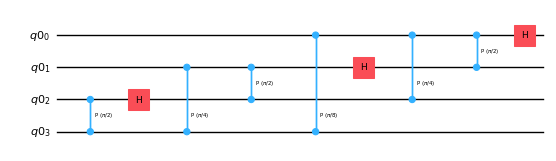

In [15]:
subcircuits[0].draw("mpl", style="iqp", scale=0.5)

In [2]:
from qsharp.estimator import EstimatorParams
from qsharp.interop.qiskit import ResourceEstimatorBackend
params = EstimatorParams()
params.error_budget = 0.01
params.constraints.max_t_factories = 1
backend = ResourceEstimatorBackend()
circuit = build_lattice_hamiltonian(num_spins=6**2, Dimension=(6,6), model='Ising')
job = backend.run(circuit, params)
r = job.result()
Q = r['physicalCounts']['physicalQubits']
T = r['physicalCounts']['runtime']*1e-9
print('\n', 'total physical qubits required: ', Q, '\n', 'total runtime', T)


 total physical qubits required:  50180 
 total runtime 0.6692400000000001


In [6]:
params1 = EstimatorParams()
params2 = EstimatorParams()
params1.constraints.max_t_factories = 1
params2.constraints.max_t_factories = 1

params1.error_budget = 0.005
job1 = backend.run(subcircuit[0], params1)
r1 = job1.result()
params2.error_budget = 0.005
job2 = backend.run(subcircuit[1], params2)
r2 = job2.result()
print(max(r1['physicalCounts']['physicalQubits'],r2['physicalCounts']['physicalQubits'])/Q)

0.8931095406360424


In [7]:
partition = list(accel_asc(20))
sub_part = []
for p in partition:
    if len(p) == 2:
        sub_part.append(list(p))
sub_parts = []
for s in sub_part:
    for l in permutations(s):
        sub_parts.append(l)
e = list(set(sub_parts))

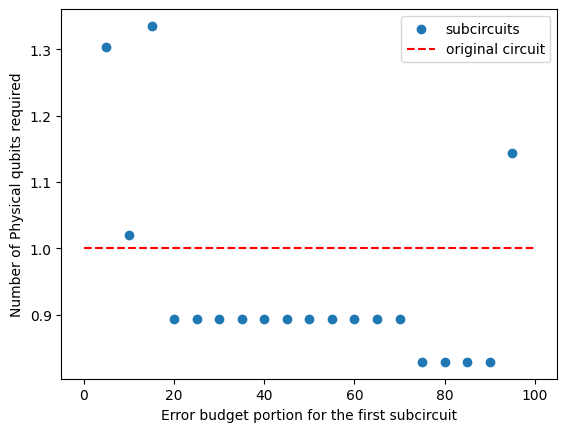

In [11]:
params1 = EstimatorParams()
params2 = EstimatorParams()
params1.constraints.max_t_factories = 1
params2.constraints.max_t_factories = 1

q = []
t1 = []  
t2 = []
for e1, e2 in e:
    params1.error_budget = e1/2e3
    job1 = backend.run(subcircuit[0], params1)
    r1 = job1.result()
    params2.error_budget = e2/2e3
    job2 = backend.run(subcircuit[1], params2)
    r2 = job2.result()
    q.append(max(r1['physicalCounts']['physicalQubits'],r2['physicalCounts']['physicalQubits']))
    t1.append(r1['physicalCounts']['runtime']*1e-9)
    t2.append(r2['physicalCounts']['runtime']*1e-9)
    # print('\n', 'subcircuit-1 : physical qubits--', r1['physicalCounts']['physicalQubits'], 'runtime (in microsec)--', r1['physicalCounts']['runtime']*1e-3)
    # print('\n', 'subcircuit-2 : physical qubits--', r2['physicalCounts']['physicalQubits'], 'runtime (in microsec)--', r2['physicalCounts']['runtime']*1e-3)

plt.scatter([5*e1 for (e1,e2) in e], [i/Q for i in q], label='subcircuits')
plt.plot([0, 100], [1, 1], 'r--', label='original circuit')
plt.legend()
plt.xlabel('Error budget portion for the first subcircuit')
plt.ylabel('Number of Physical qubits required')
plt.show()


In [14]:
[5*e1 for (e1,e2) in e]

[85, 40, 45, 80, 75, 30, 35, 70, 25, 65, 60, 20, 95, 15, 55, 50, 10, 90, 5]

In [9]:
[i/Q for i in q]

[0.8289752650176678,
 0.8931095406360424,
 0.8931095406360424,
 0.8289752650176678,
 0.8289752650176678,
 0.8931095406360424,
 0.8931095406360424,
 0.8931095406360424,
 0.8931095406360424,
 0.8931095406360424,
 0.8931095406360424,
 0.8931095406360424,
 1.1438162544169612,
 1.3351590106007067,
 0.8931095406360424,
 0.8931095406360424,
 1.0203180212014133,
 0.8289752650176678,
 1.3030035335689045]

In [12]:
t1

[0.0042592,
 0.005478,
 0.005478,
 0.0042592,
 0.0042592,
 0.005478,
 0.005478,
 0.005478,
 0.005478,
 0.005478,
 0.005478,
 0.0059004,
 0.003933600000000001,
 0.0057824,
 0.005478,
 0.005478,
 0.005896800000000001,
 0.003933600000000001,
 0.0077220000000000006]

In [13]:
t2

[0.0019668000000000003,
 0.001422,
 0.001422,
 0.0019668000000000003,
 0.0019668000000000003,
 0.001422,
 0.001422,
 0.0012232,
 0.001422,
 0.00143,
 0.0012024000000000002,
 0.001422,
 0.0017820000000000002,
 0.001422,
 0.001422,
 0.001422,
 0.001422,
 0.0019668000000000003,
 0.001422]